# Scenario 3: CROP RECOMMENDATION SYSTEM

A state Agricultural Development Officer is studying the
relationship between soil conditions and crop yields. They have access to a
dataset of soil nutrient levels and a shapefile of agricultural land parcels.
They want to identify areas with optimal soil conditions for specific crops and
recommend suitable crop types for those areas. Develop a model to solve the
problem using Python and also explain your solution with complete documentation.
Upload the solution code and documentation in the GitHub Public Repository.
Share the code, visualization, GitHub Link and other stuff in the Google
Classroom.


# About the data
The information utilized in this project is generated by enhancing and merging diverse publicly accessible datasets from India, encompassing factors such as weather and soil. The dataset is available for access [here](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset). Unlike intricate factors that impact crop yield, this data is relatively straightforward, featuring a limited yet valuable set of features.

Included in the dataset are soil attributes like Nitrogen, Phosphorous, Potassium, and pH values. Additionally, it incorporates essential environmental factors such as humidity, temperature, and rainfall specific to each crop.
Context
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

Context
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

Data fields
##### N - ratio of Nitrogen content in soil
##### P - ratio of Phosphorous content in soil
##### K - ratio of Potassium content in soil
##### temperature - temperature in degree Celsius
##### humidity - relative humidity in %
##### ph - ph value of the soil
##### rainfall - rainfall in mm

### Importing libraries

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

## Loading and Displaying Dataset

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
dataset=pd.read_csv("/content/drive/MyDrive/cropdataset/Crop_recommendation.csv")

In [152]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### this is a classification problem where the output will be in a categorical form

In [153]:
dataset.shape

(2200, 8)

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [155]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [156]:
dataset.duplicated().sum()

0

In [157]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Exploring Dataset

In [158]:
corr=dataset.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

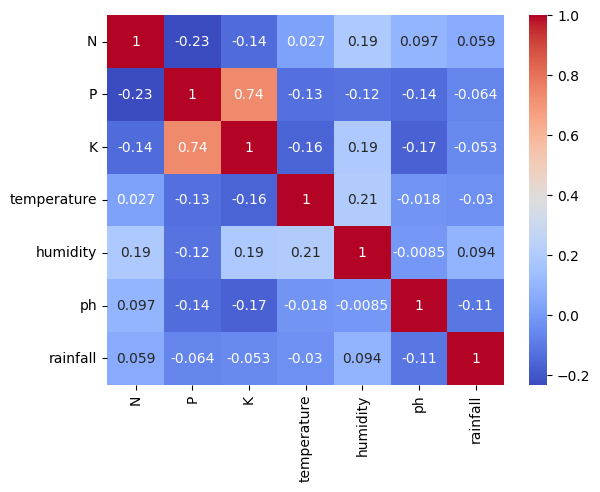

In [159]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [160]:
dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: ylabel='label'>

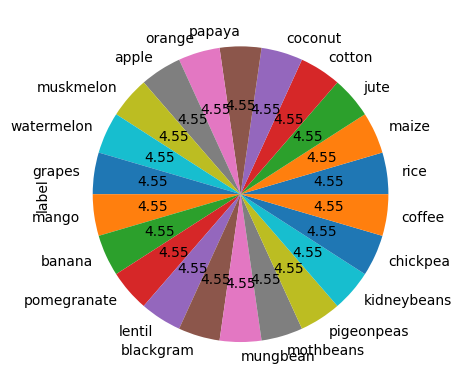

In [161]:
dataset['label'].value_counts().plot(kind='pie',autopct="%.2f")

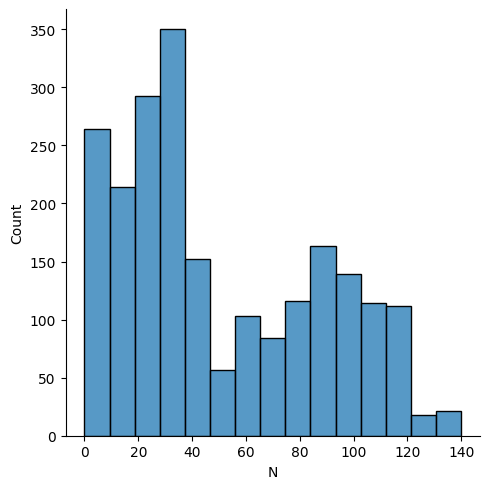

In [162]:
sns.displot(dataset['N'])

<ipython-input-163-ee3f2516cc75>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['N'])
<ipython-input-163-ee3f2516cc75>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['P'])
<ipython-input-163-ee3f2516cc75>:11: UserWarning: 

`distplot` is a deprecated function and will be remo

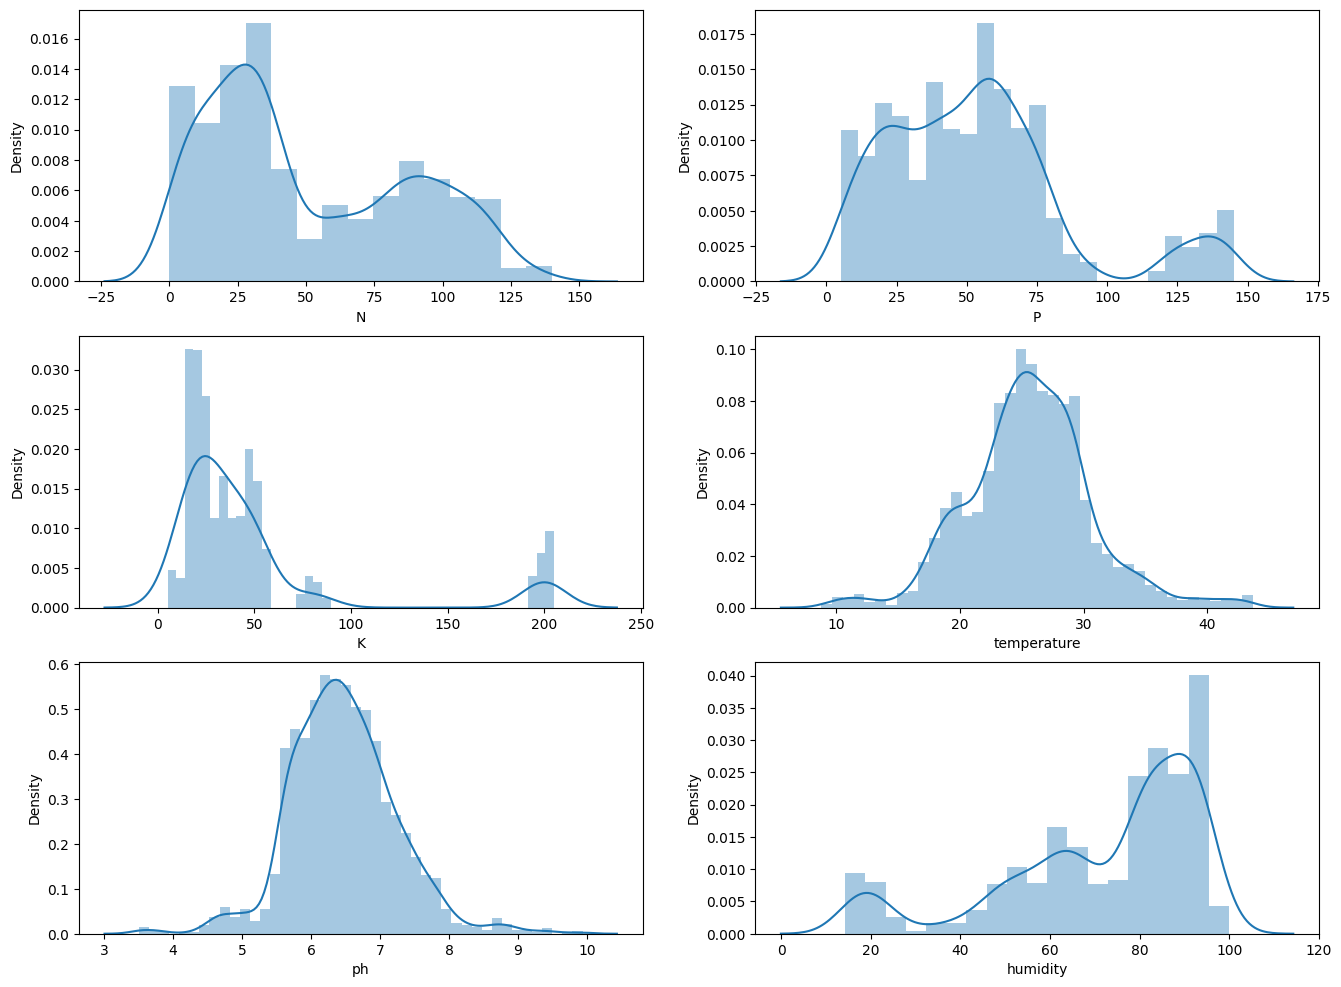

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.distplot(dataset['N'])

plt.subplot(3,2,2)
sns.distplot(dataset['P'])

plt.subplot(3,2,3)
sns.distplot(dataset['K'])

plt.subplot(3,2,4)
sns.distplot(dataset['temperature'])

plt.subplot(3,2,5)
sns.distplot(dataset['ph'])

plt.subplot(3,2,6)
sns.distplot(dataset['humidity'])

plt.show()

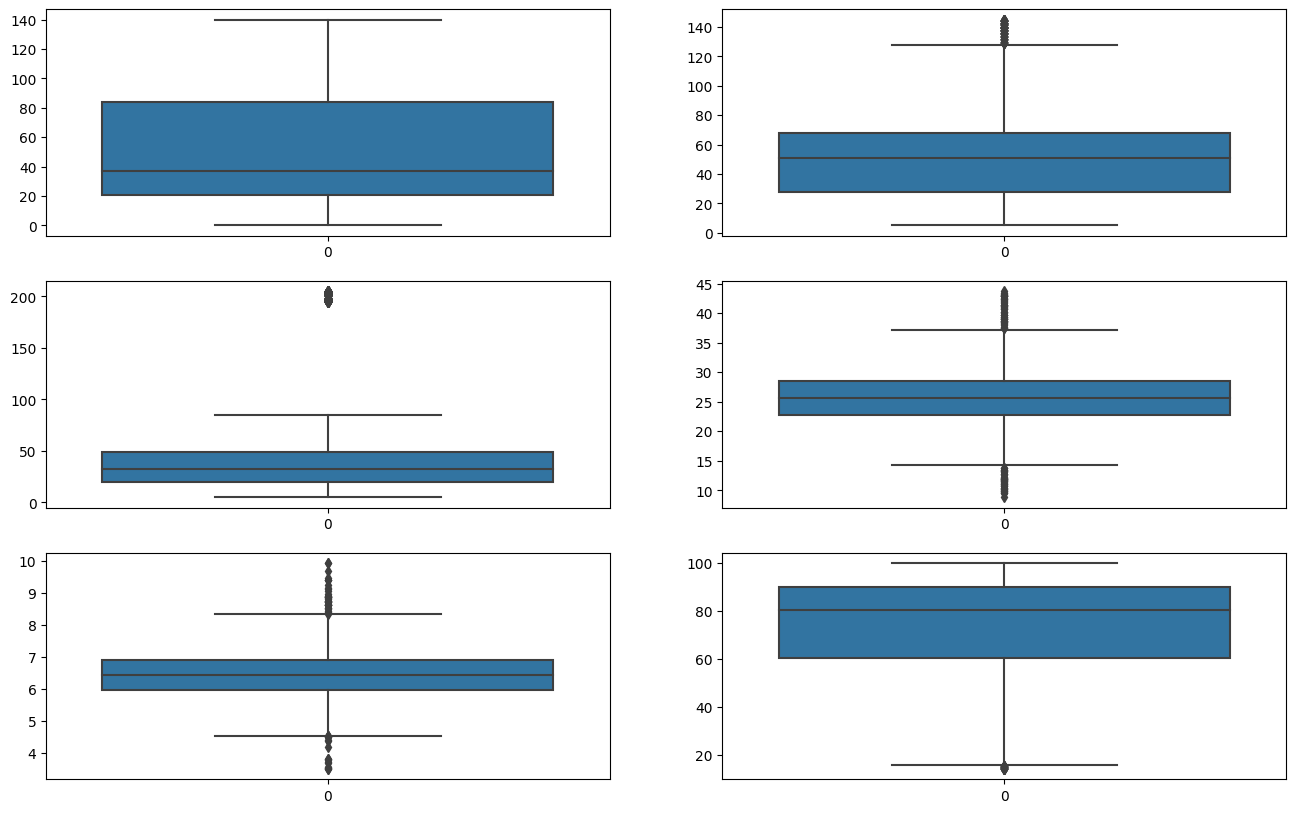

In [164]:
import seaborn as sns
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.boxplot(dataset['N'])

plt.subplot(3,2,2)
sns.boxplot(dataset['P'])

plt.subplot(3,2,3)
sns.boxplot(dataset['K'])

plt.subplot(3,2,4)
sns.boxplot(dataset['temperature'])

plt.subplot(3,2,5)
sns.boxplot(dataset['ph'])

plt.subplot(3,2,6)
sns.boxplot(dataset['humidity'])

plt.show()

#### Converting Categorical varibales to a integer format

In [165]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
dataset['crop_num']=dataset['label'].map(crop_dict)

In [166]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


#### Removing Label column from the dataset

In [167]:
dataset=dataset.drop('label',axis=1)

### Training , Testing and Splitting Dataset

In [168]:
features=dataset.drop('crop_num',axis=1)
target=dataset['crop_num']

In [169]:
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [170]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [171]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [172]:
Xtrain.shape

(1760, 7)

In [173]:
Xtest.shape

(440, 7)

In [174]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [175]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

### Model Building

# Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           1       1.00      0.62      0.77        16
           2       1.00      1.00      1.00        21
           3       0.74      0.93      0.83        28
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21
           6       1.00      0.84      0.91        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       0.68      1.00      0.81        23
          16       0.59      1.00      0.74        16
          17       1.00      1.00      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
from sklearn.model_selection import cross_val_score

In [178]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, target,cv=5)

In [179]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.85909091, 0.93636364])

### Saving trained Decision Tree model

In [180]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [181]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        16
           2       1.00      1.00      1.00        21
           3       0.88      1.00      0.93        28
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        16
          17       1.00      1.00  

In [182]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [183]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [184]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

           1       0.50      0.06      0.11        16
           2       0.00      0.00      0.00        21
           3       1.00      0.07      0.13        28
           4       1.00      0.05      0.10        20
           5       1.00      0.05      0.09        21
           6       1.00      0.05      0.10        19
           7       1.00      0.03      0.07        29
           8       1.00      0.23      0.38        13
           9       1.00      0.30      0.47        23
          10       1.00      0.13      0.24        15
          11       1.00      0.06      0.11        18
          12       0.00      0.00      0.00        26
          13       1.00      0.24      0.38        17
          14       1.00      0.12      0.21        17
          15       0.00      0.00      0.00        23
          16       1.00      0.19      0.32        16
          17       1.00      0.12      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           1       0.85      0.69      0.76        16
           2       0.90      0.86      0.88        21
           3       0.84      0.93      0.88        28
           4       0.86      0.90      0.88        20
           5       1.00      1.00      1.00        21
           6       1.00      0.95      0.97        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       0.96      1.00      0.98        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       0.88      1.00      0.94        23
          16       0.86      0.75      0.80        16
          17       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [188]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        16
           2       1.00      1.00      1.00        21
           3       0.90      1.00      0.95        28
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       0.94      1.00      0.97        16
          17       1.00      1.00      1.00 

In [190]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [191]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

In [200]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '=', v)

Decision Tree = 0.9
Naive Bayes = 0.990909090909091
SVM = 0.10681818181818181
Logistic Regression = 0.9522727272727273
RF = 0.990909090909091


### From the Above Accuracies, We have adopt Random Forest as it has Maximum Accuracy

In [194]:

classifier=RandomForestClassifier()
classifier.fit(Xtrain,Ytrain)
ypred=classifier.predict(Xtest)

In [195]:

accuracy_score(Ytest,ypred)*100

99.31818181818181

### Sample Predictions

In [196]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = DecisionTree.predict(features).reshape(1,-1)

    return prediction[0]

In [197]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Chickpea is a best crop to be cultivated 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [198]:
N = 30
P = 10
k = 40
temperature = 43.0
humidity = 30
ph = 90
rainfall = 120

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Pomegranate is a best crop to be cultivated 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [199]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()